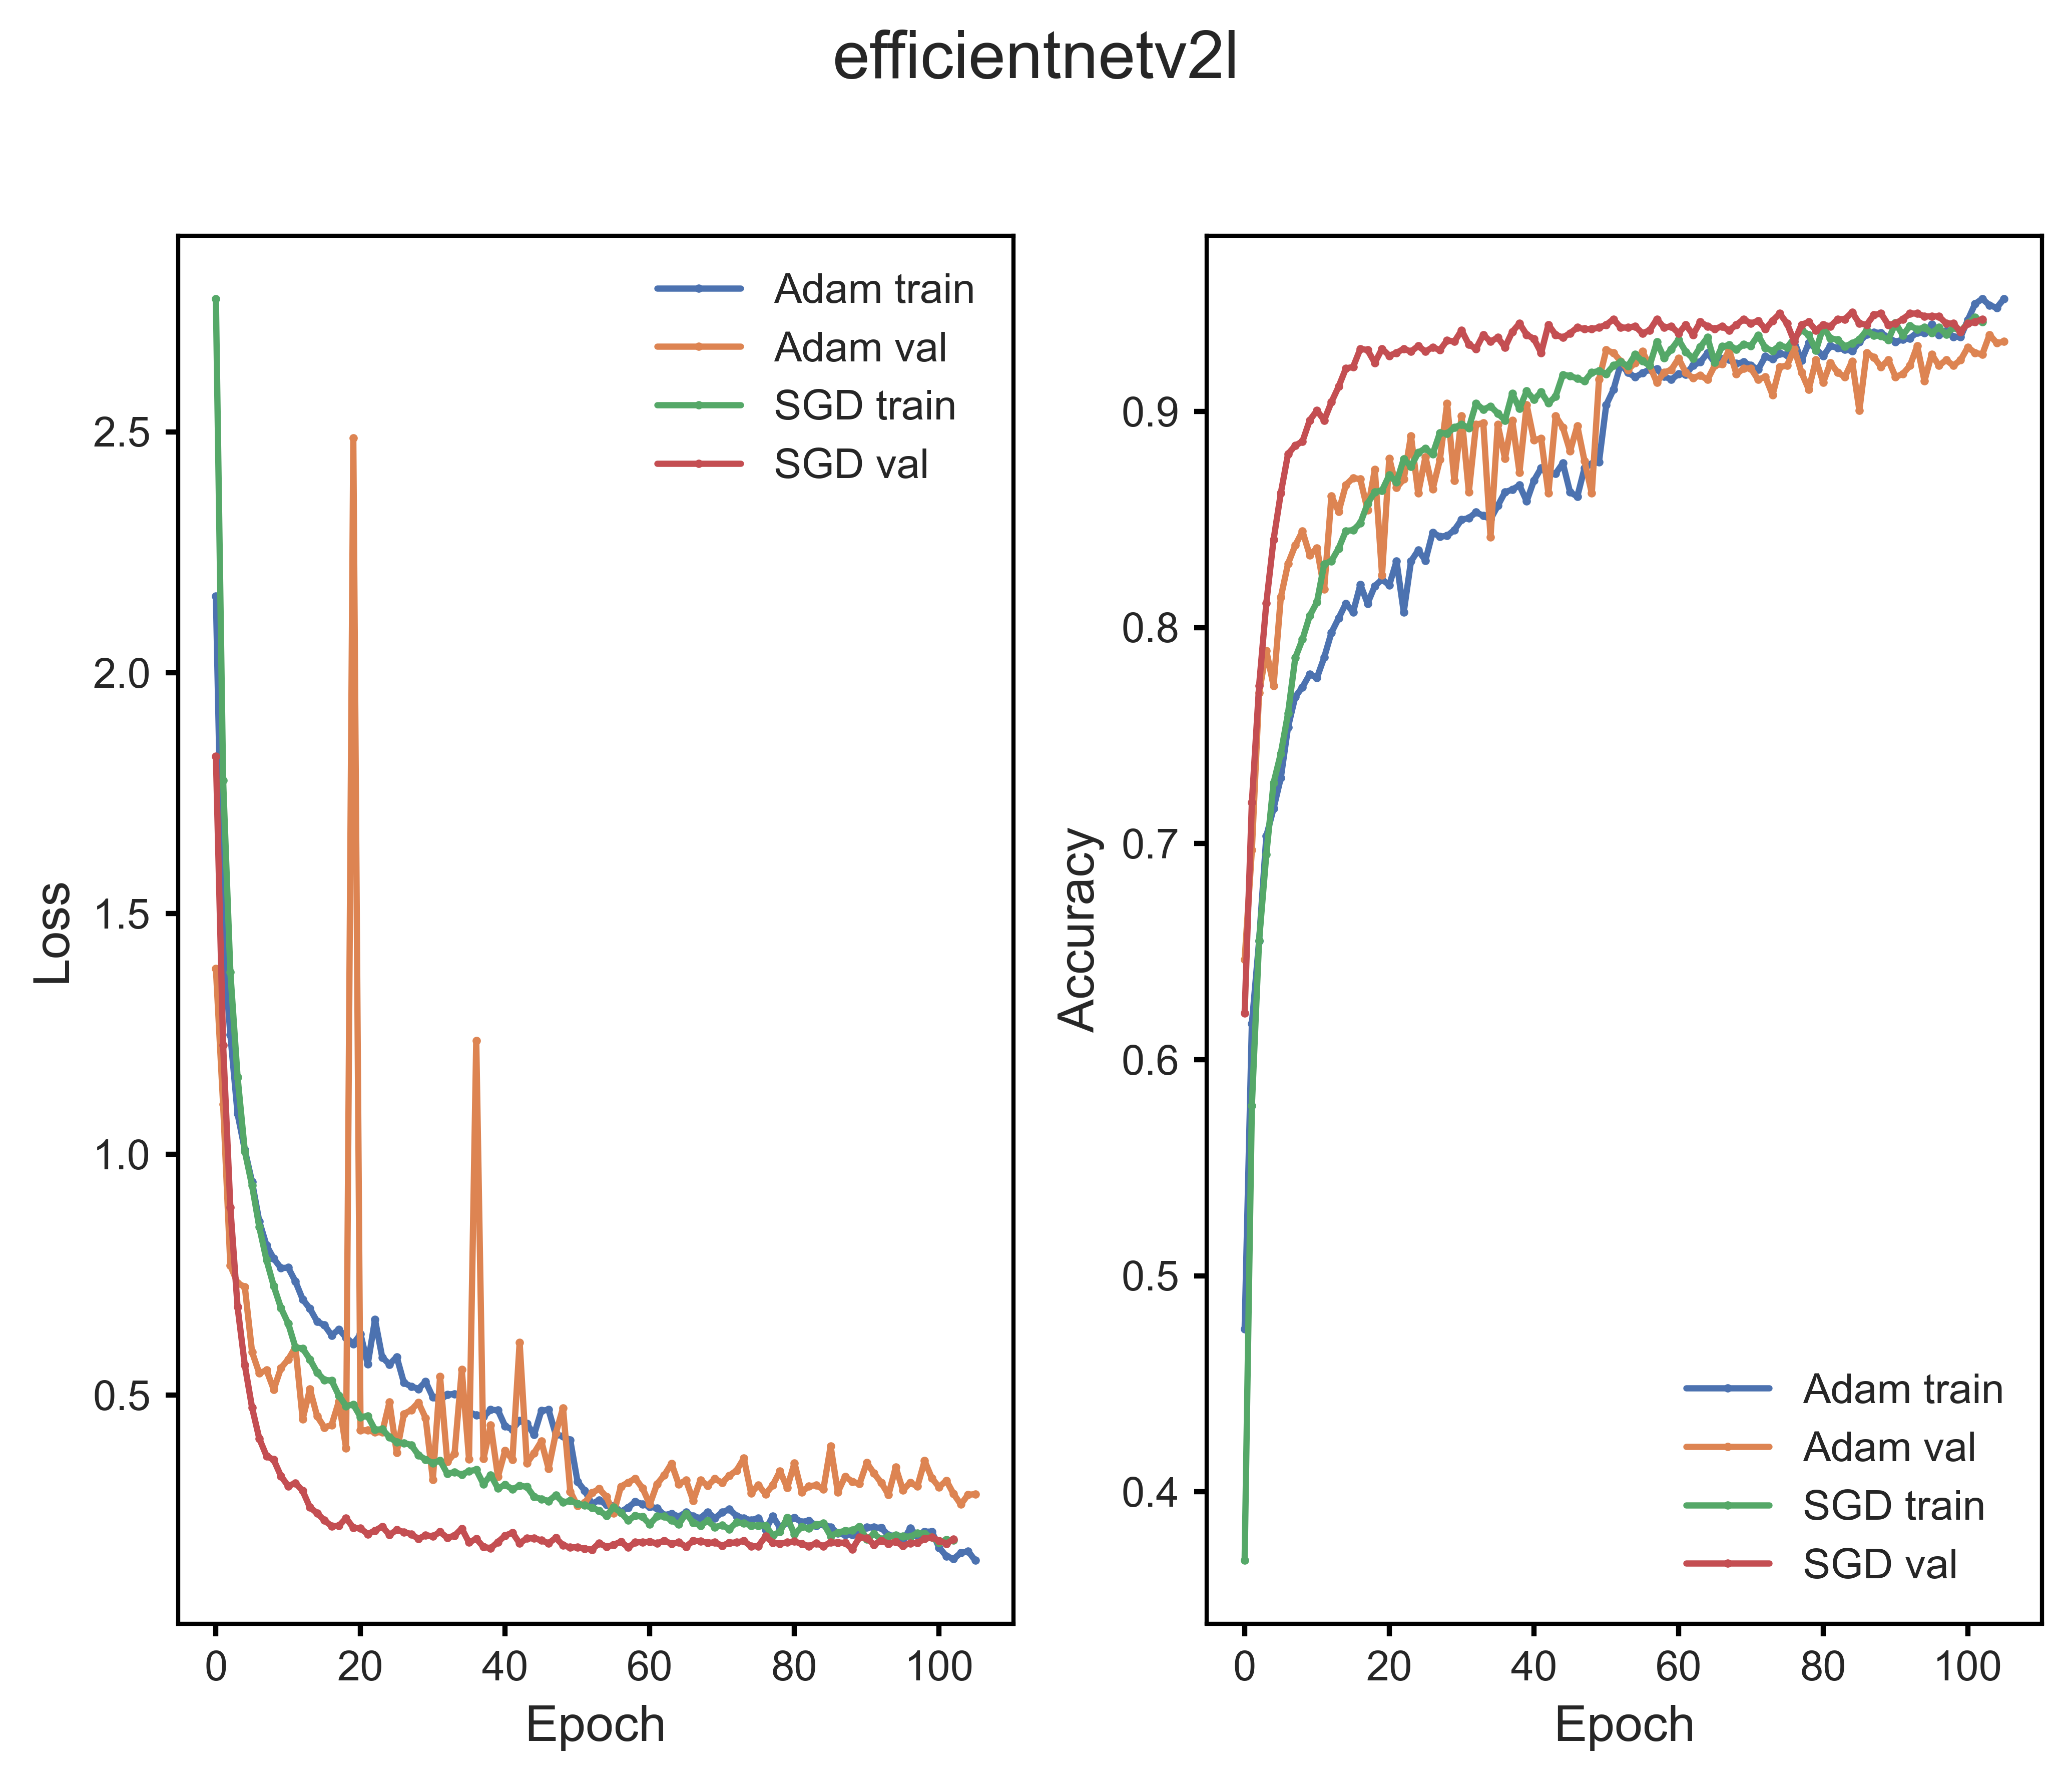

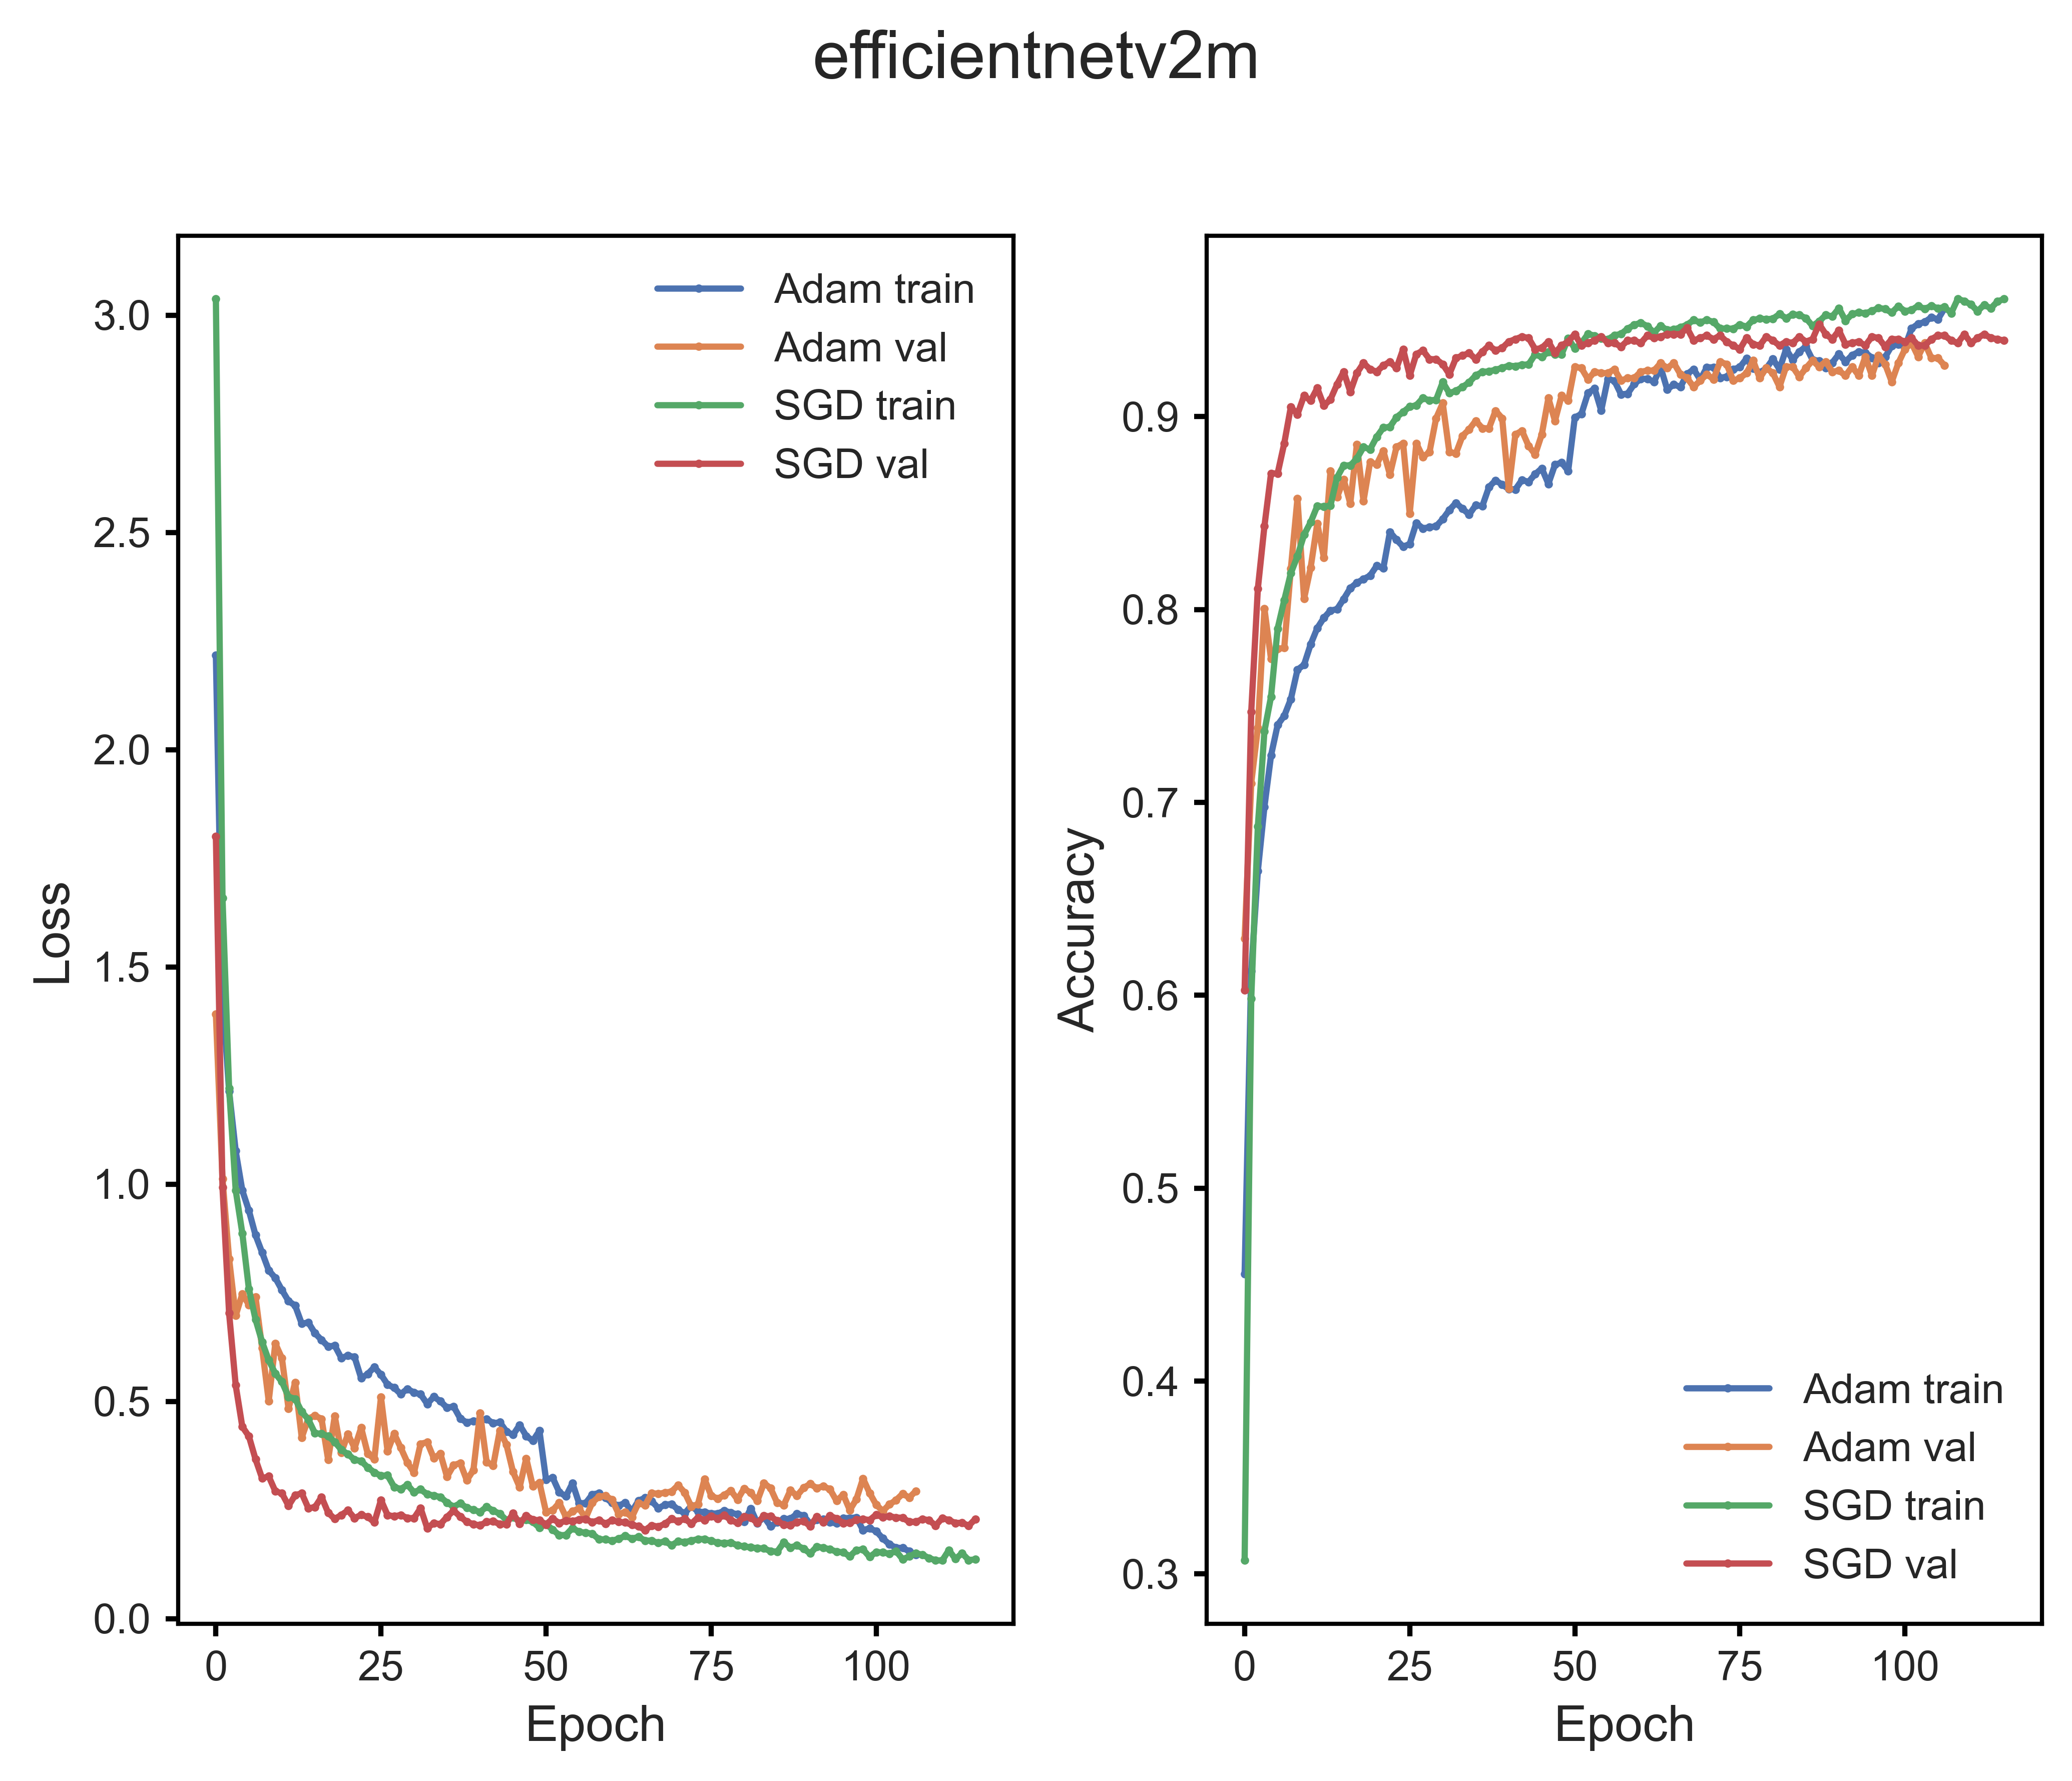

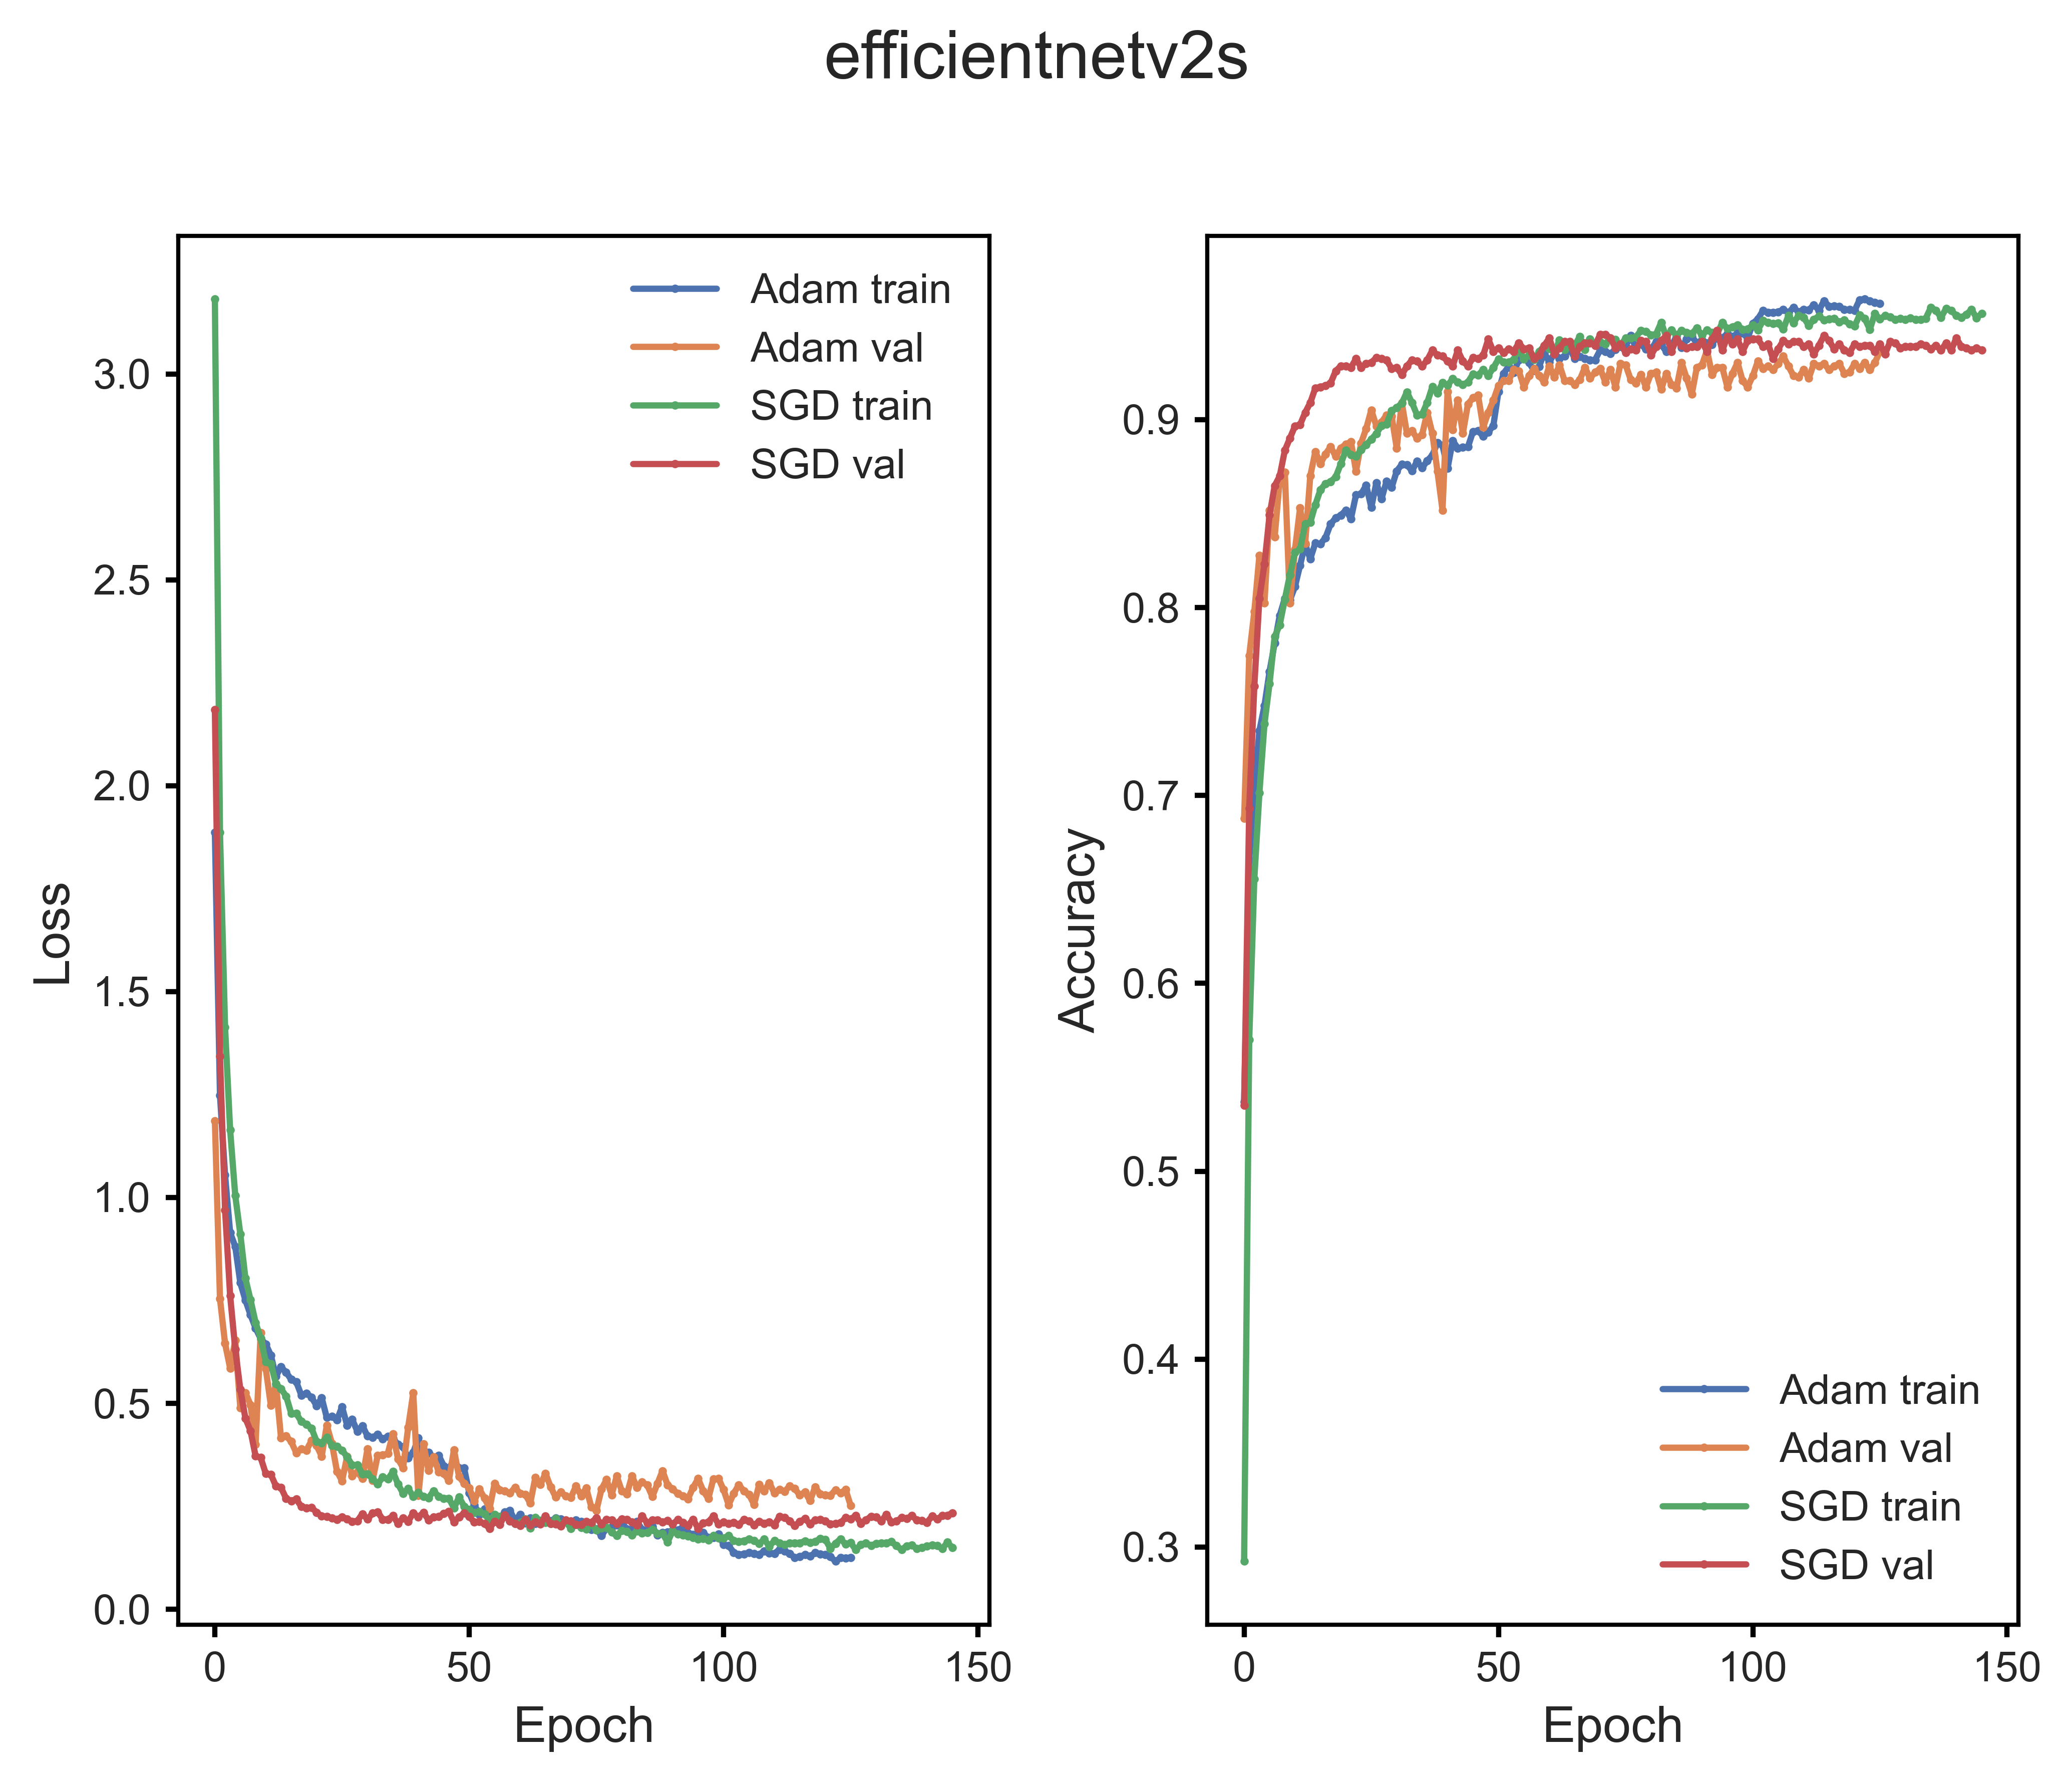

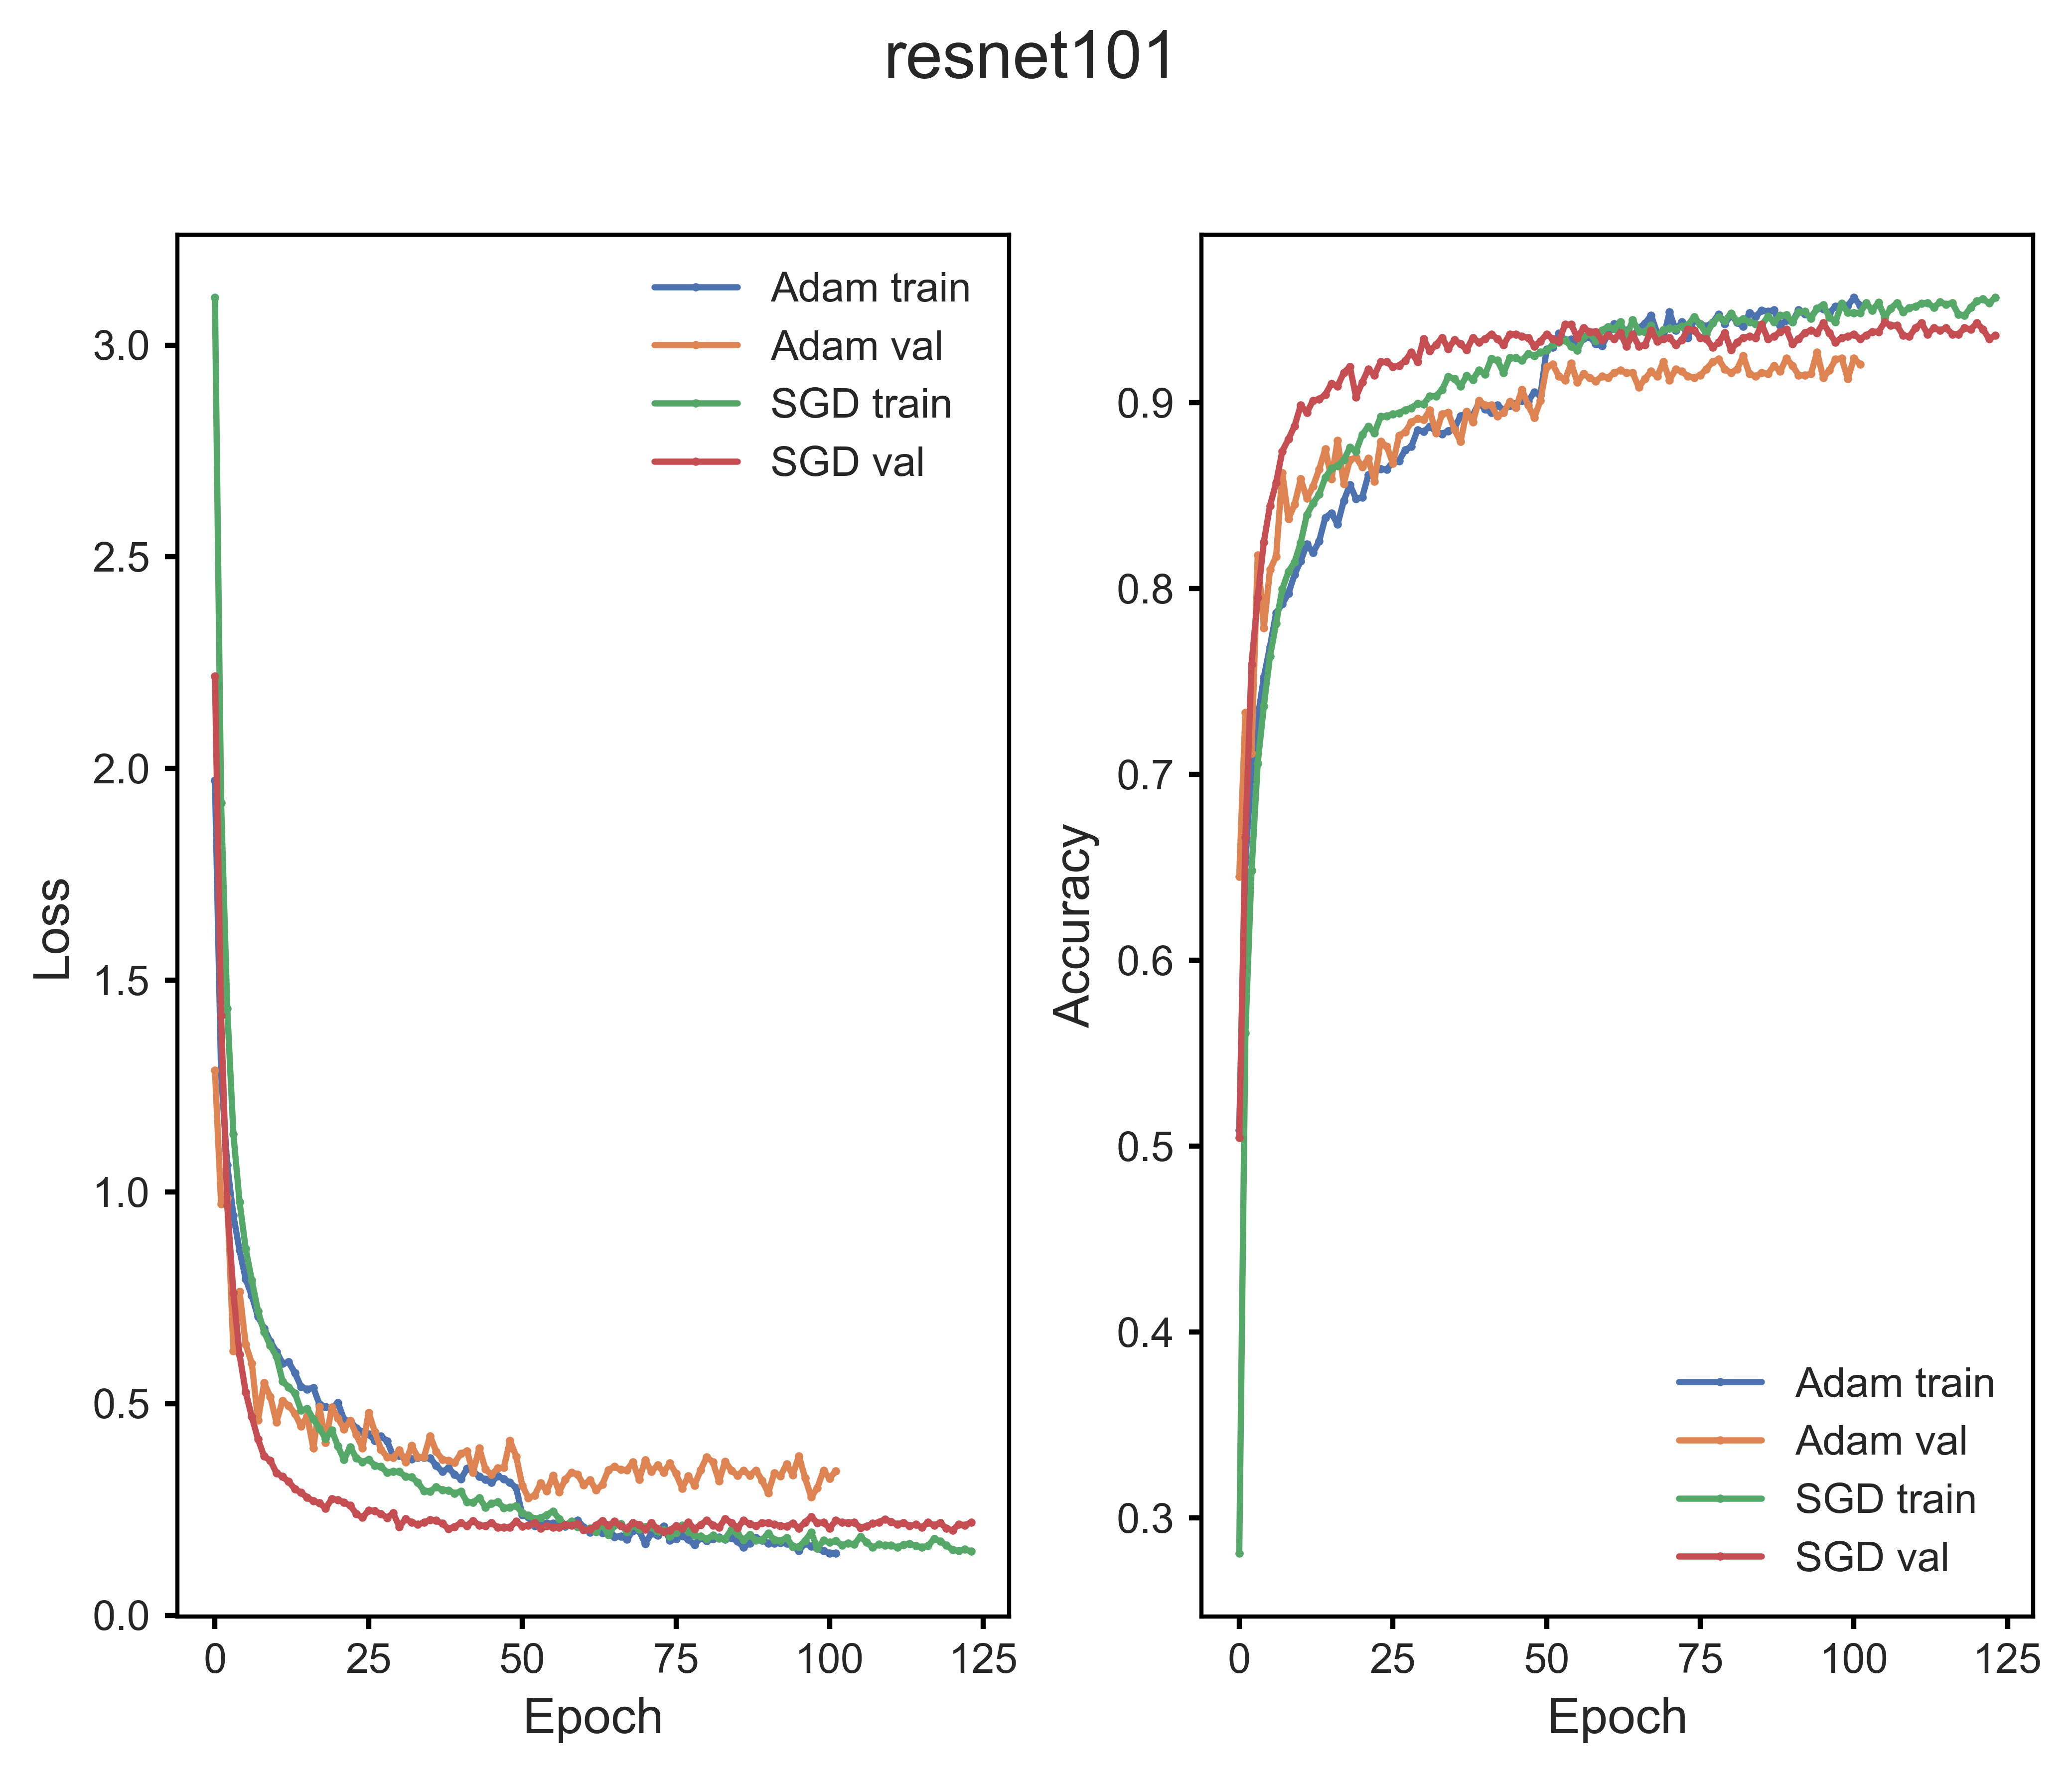

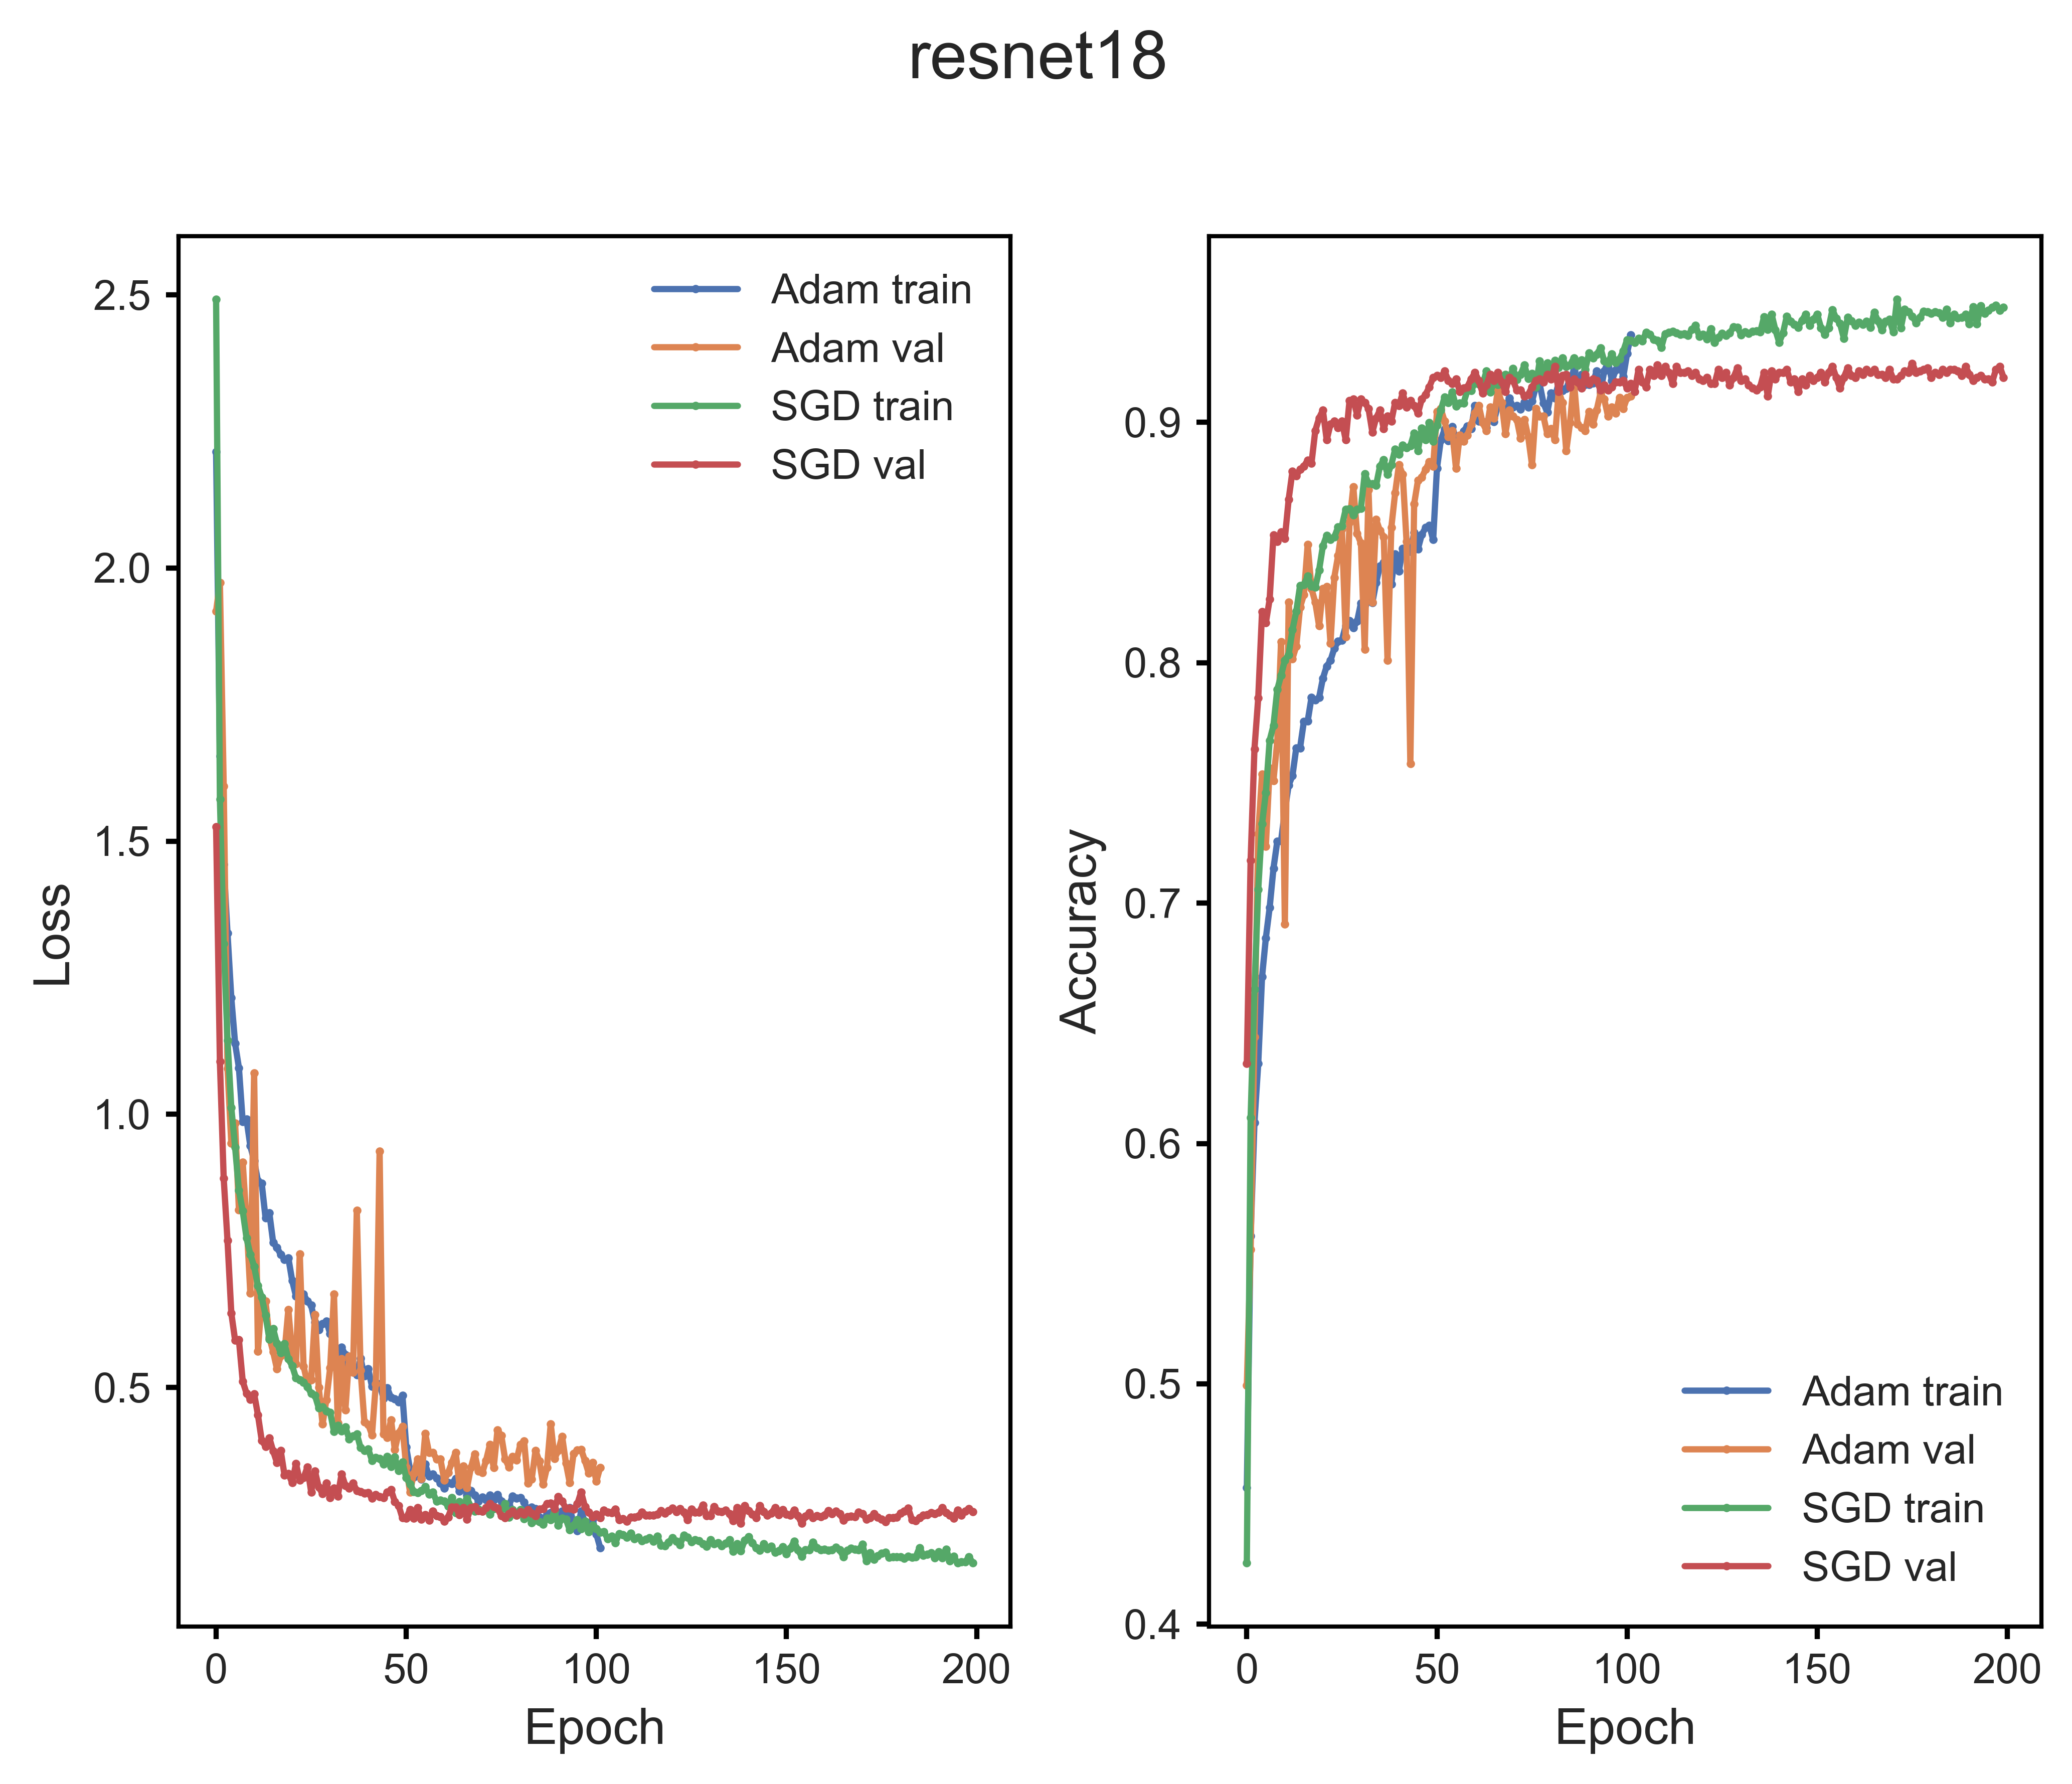

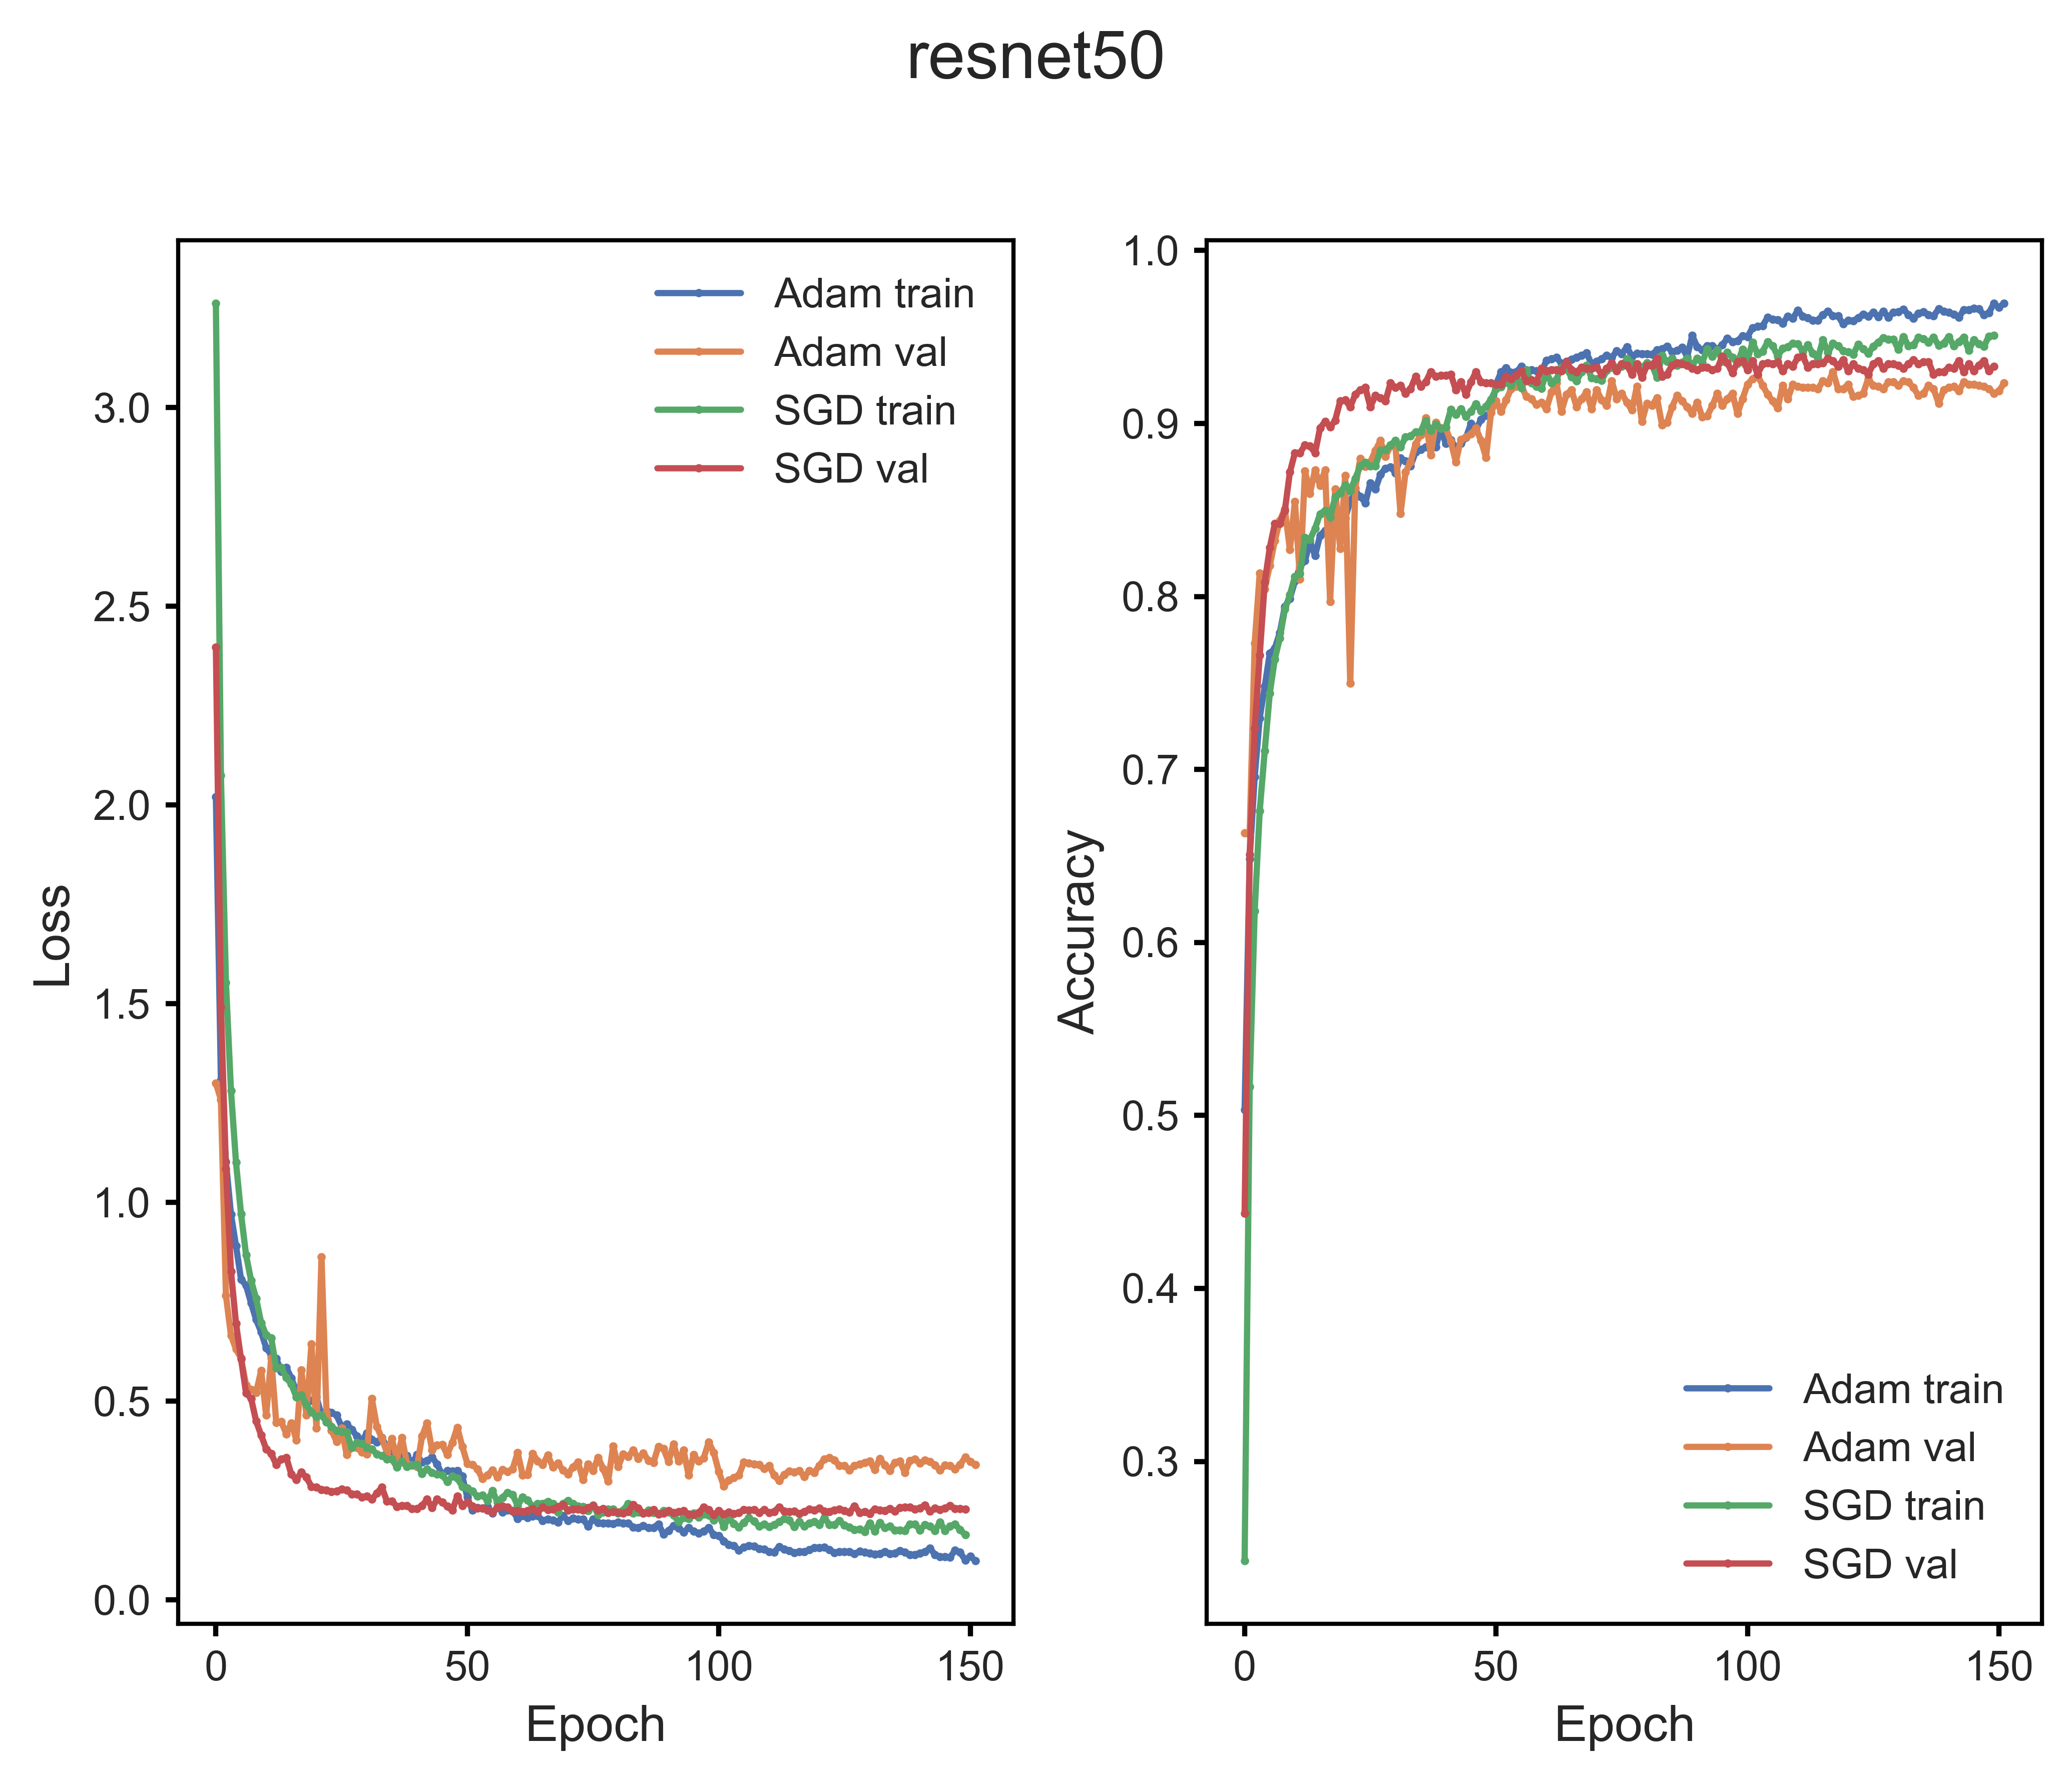

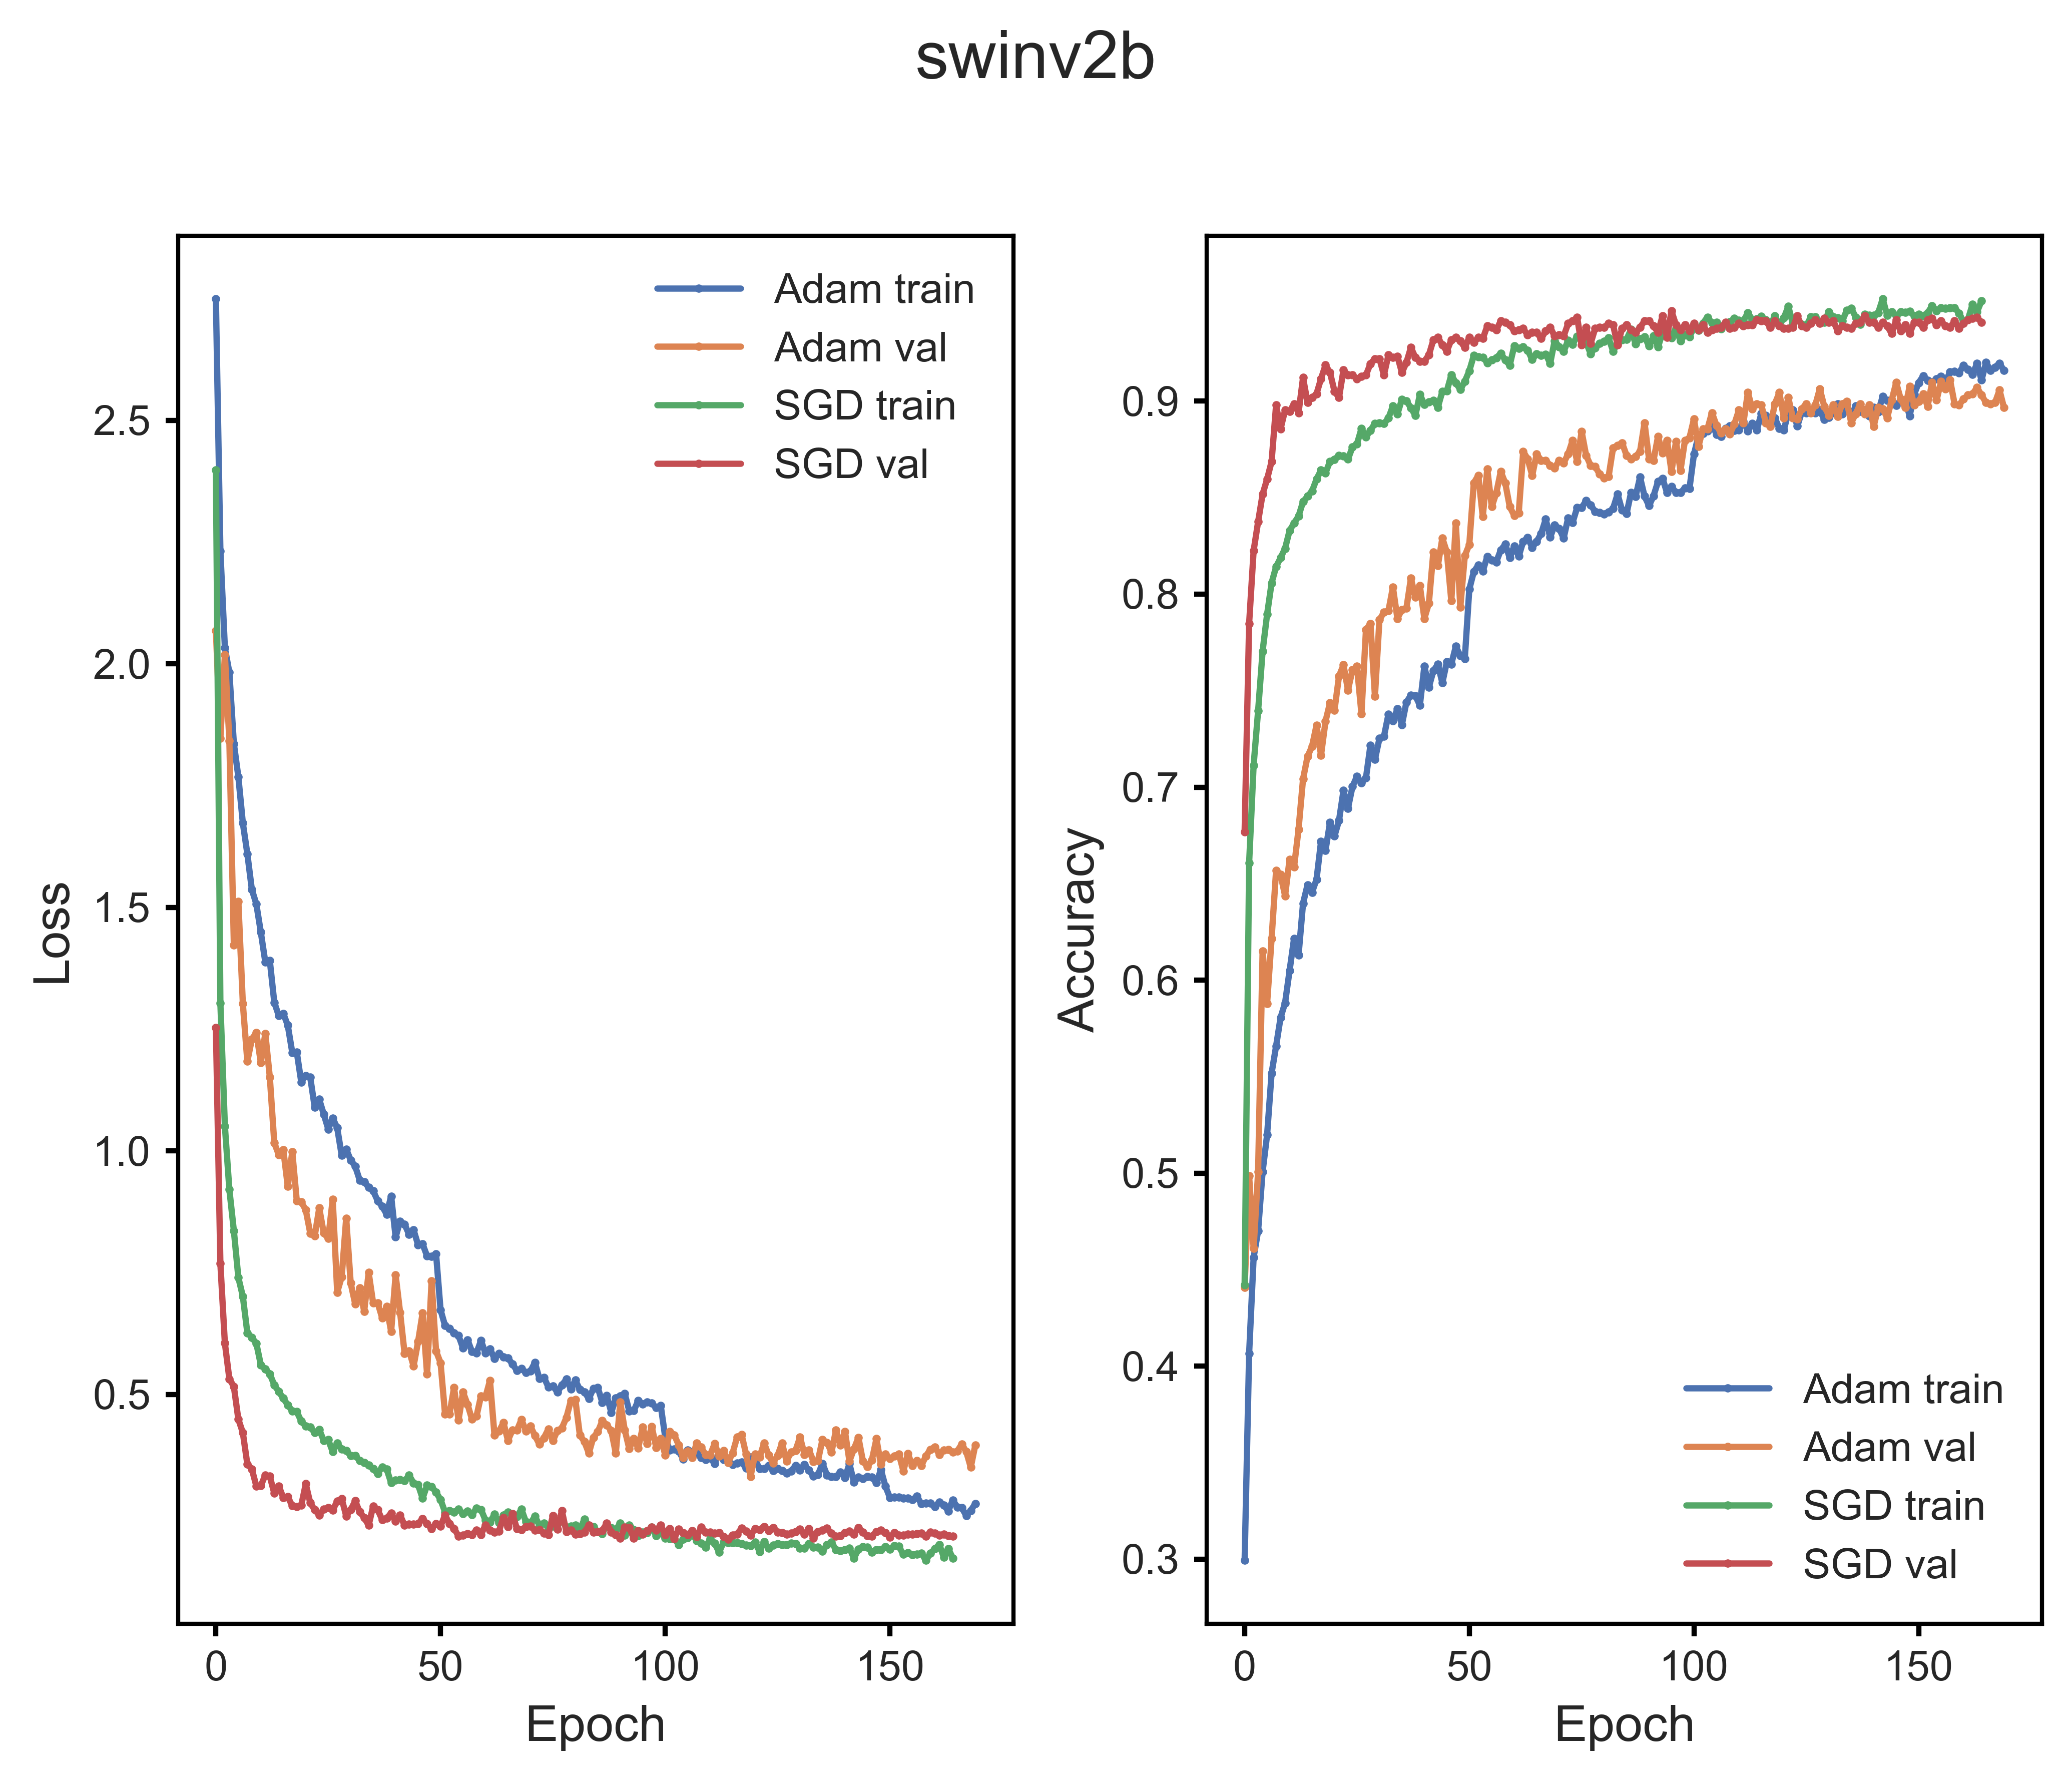

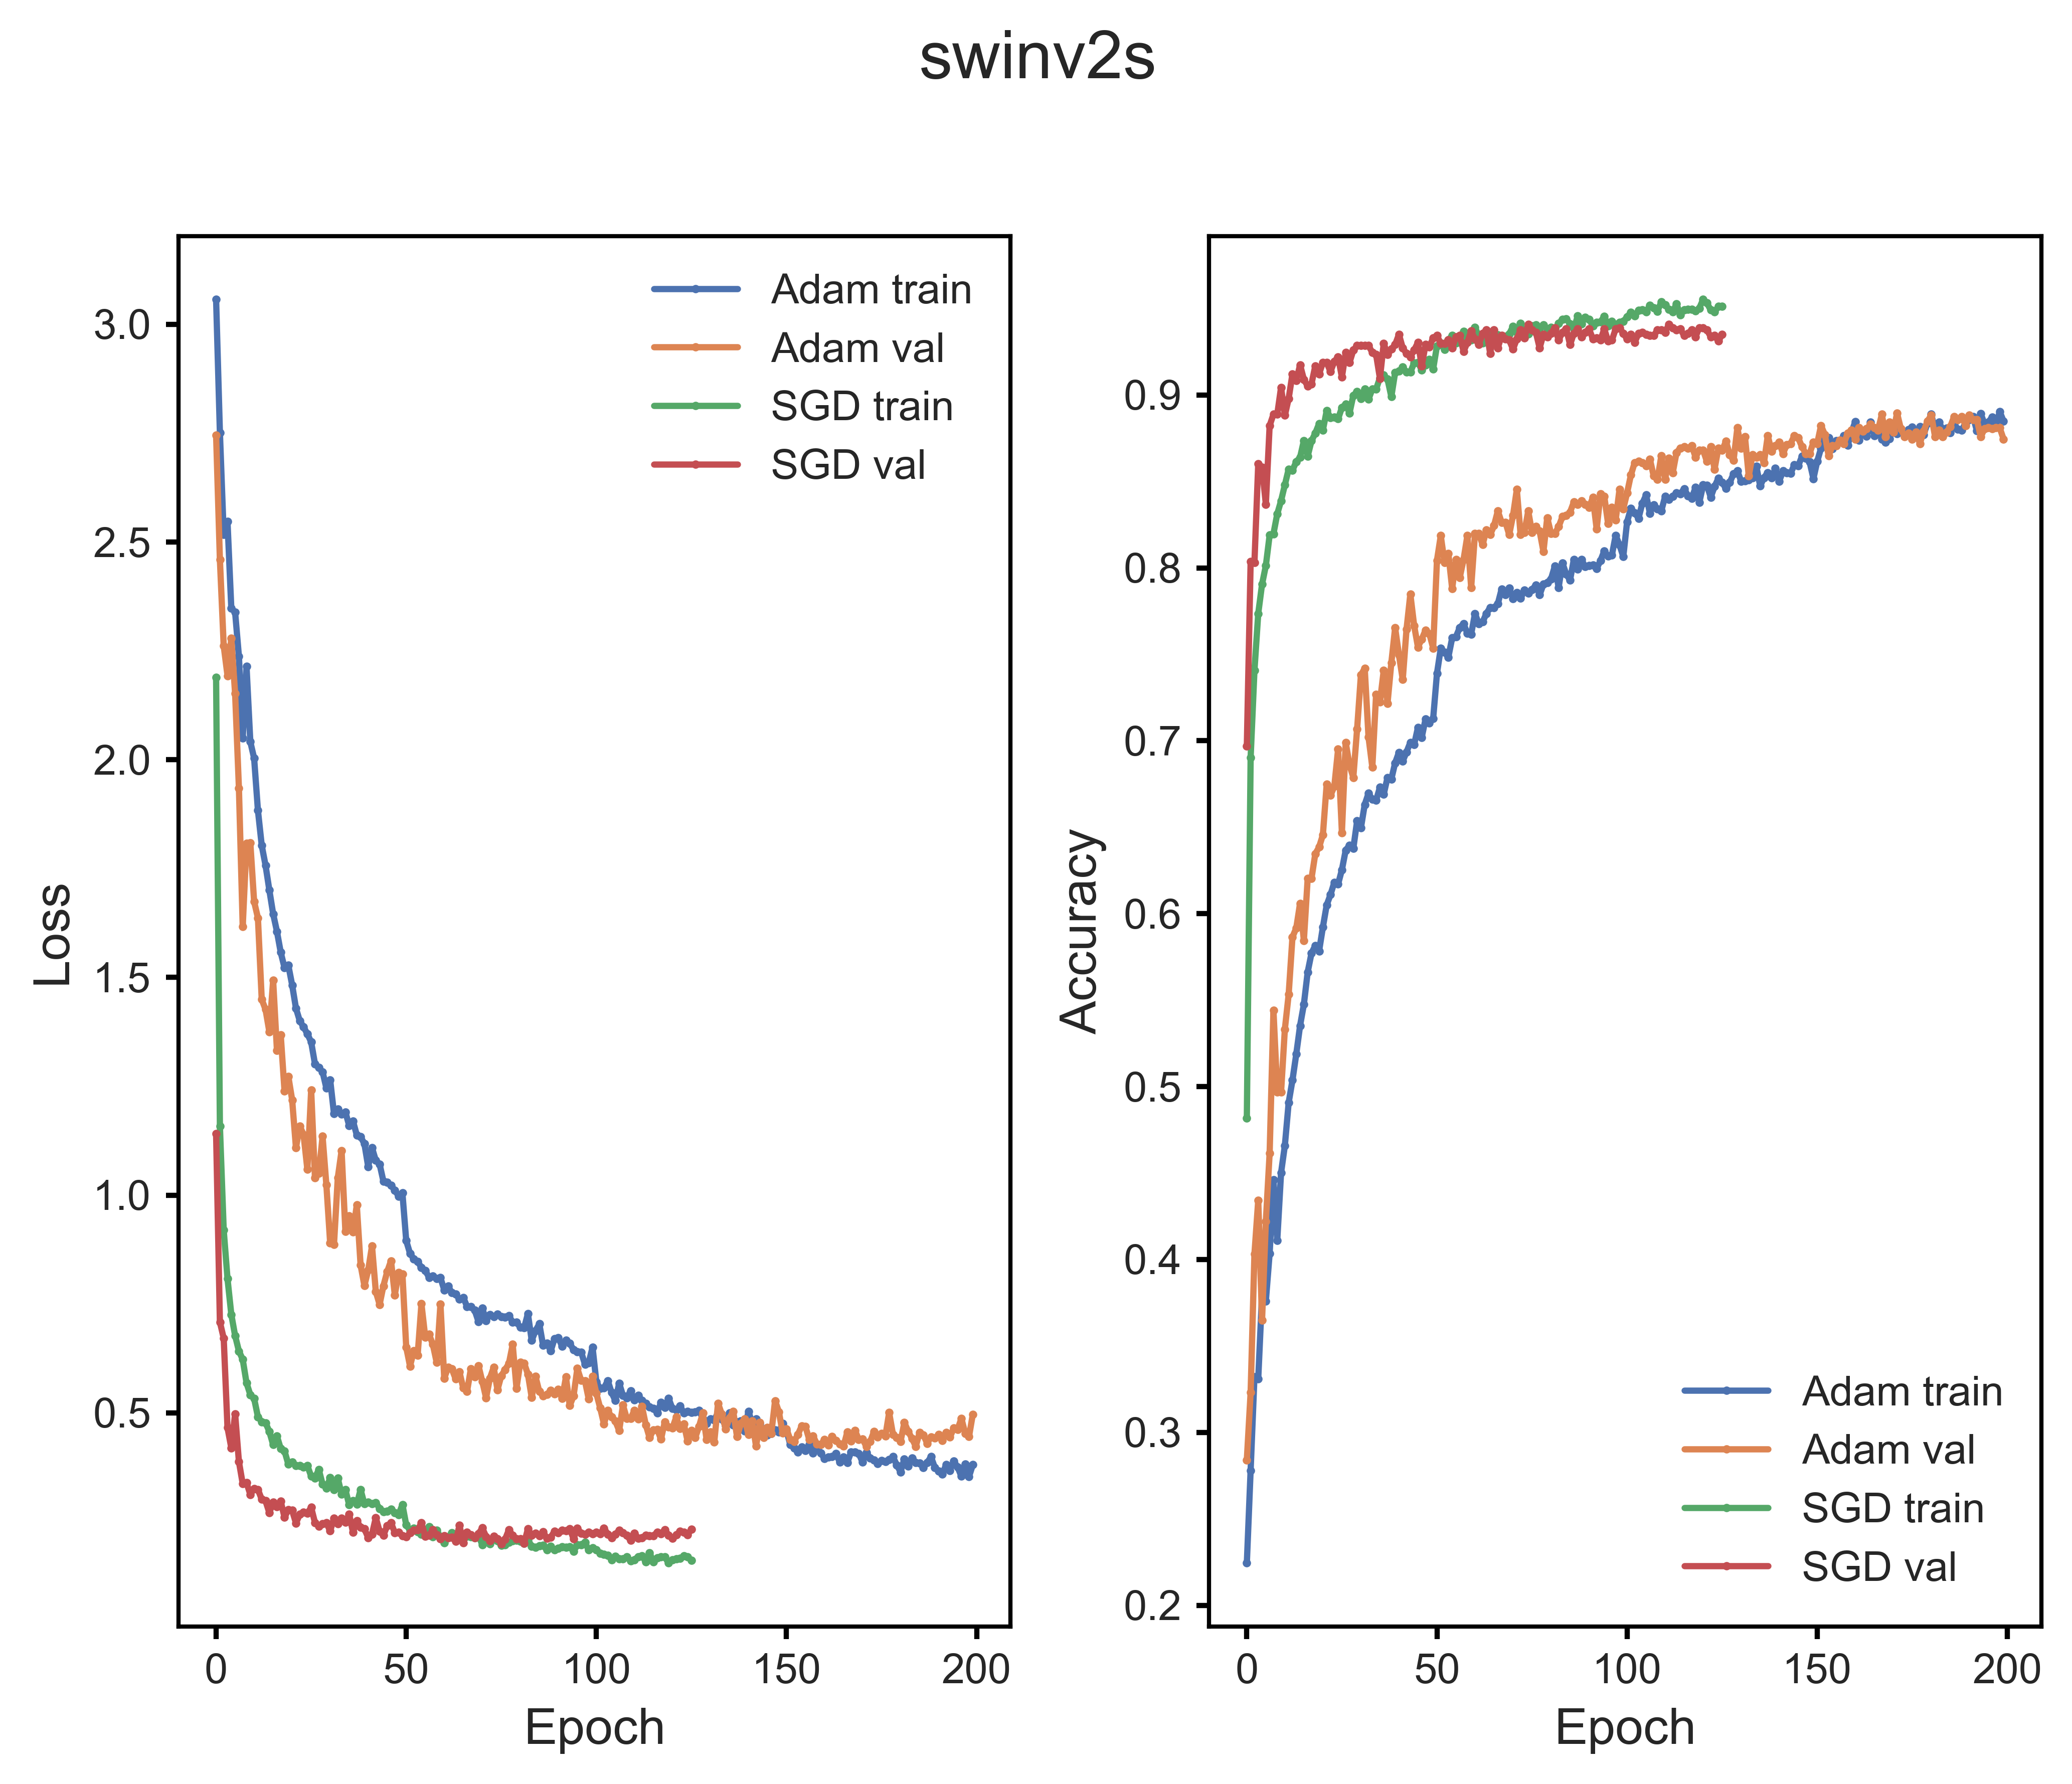

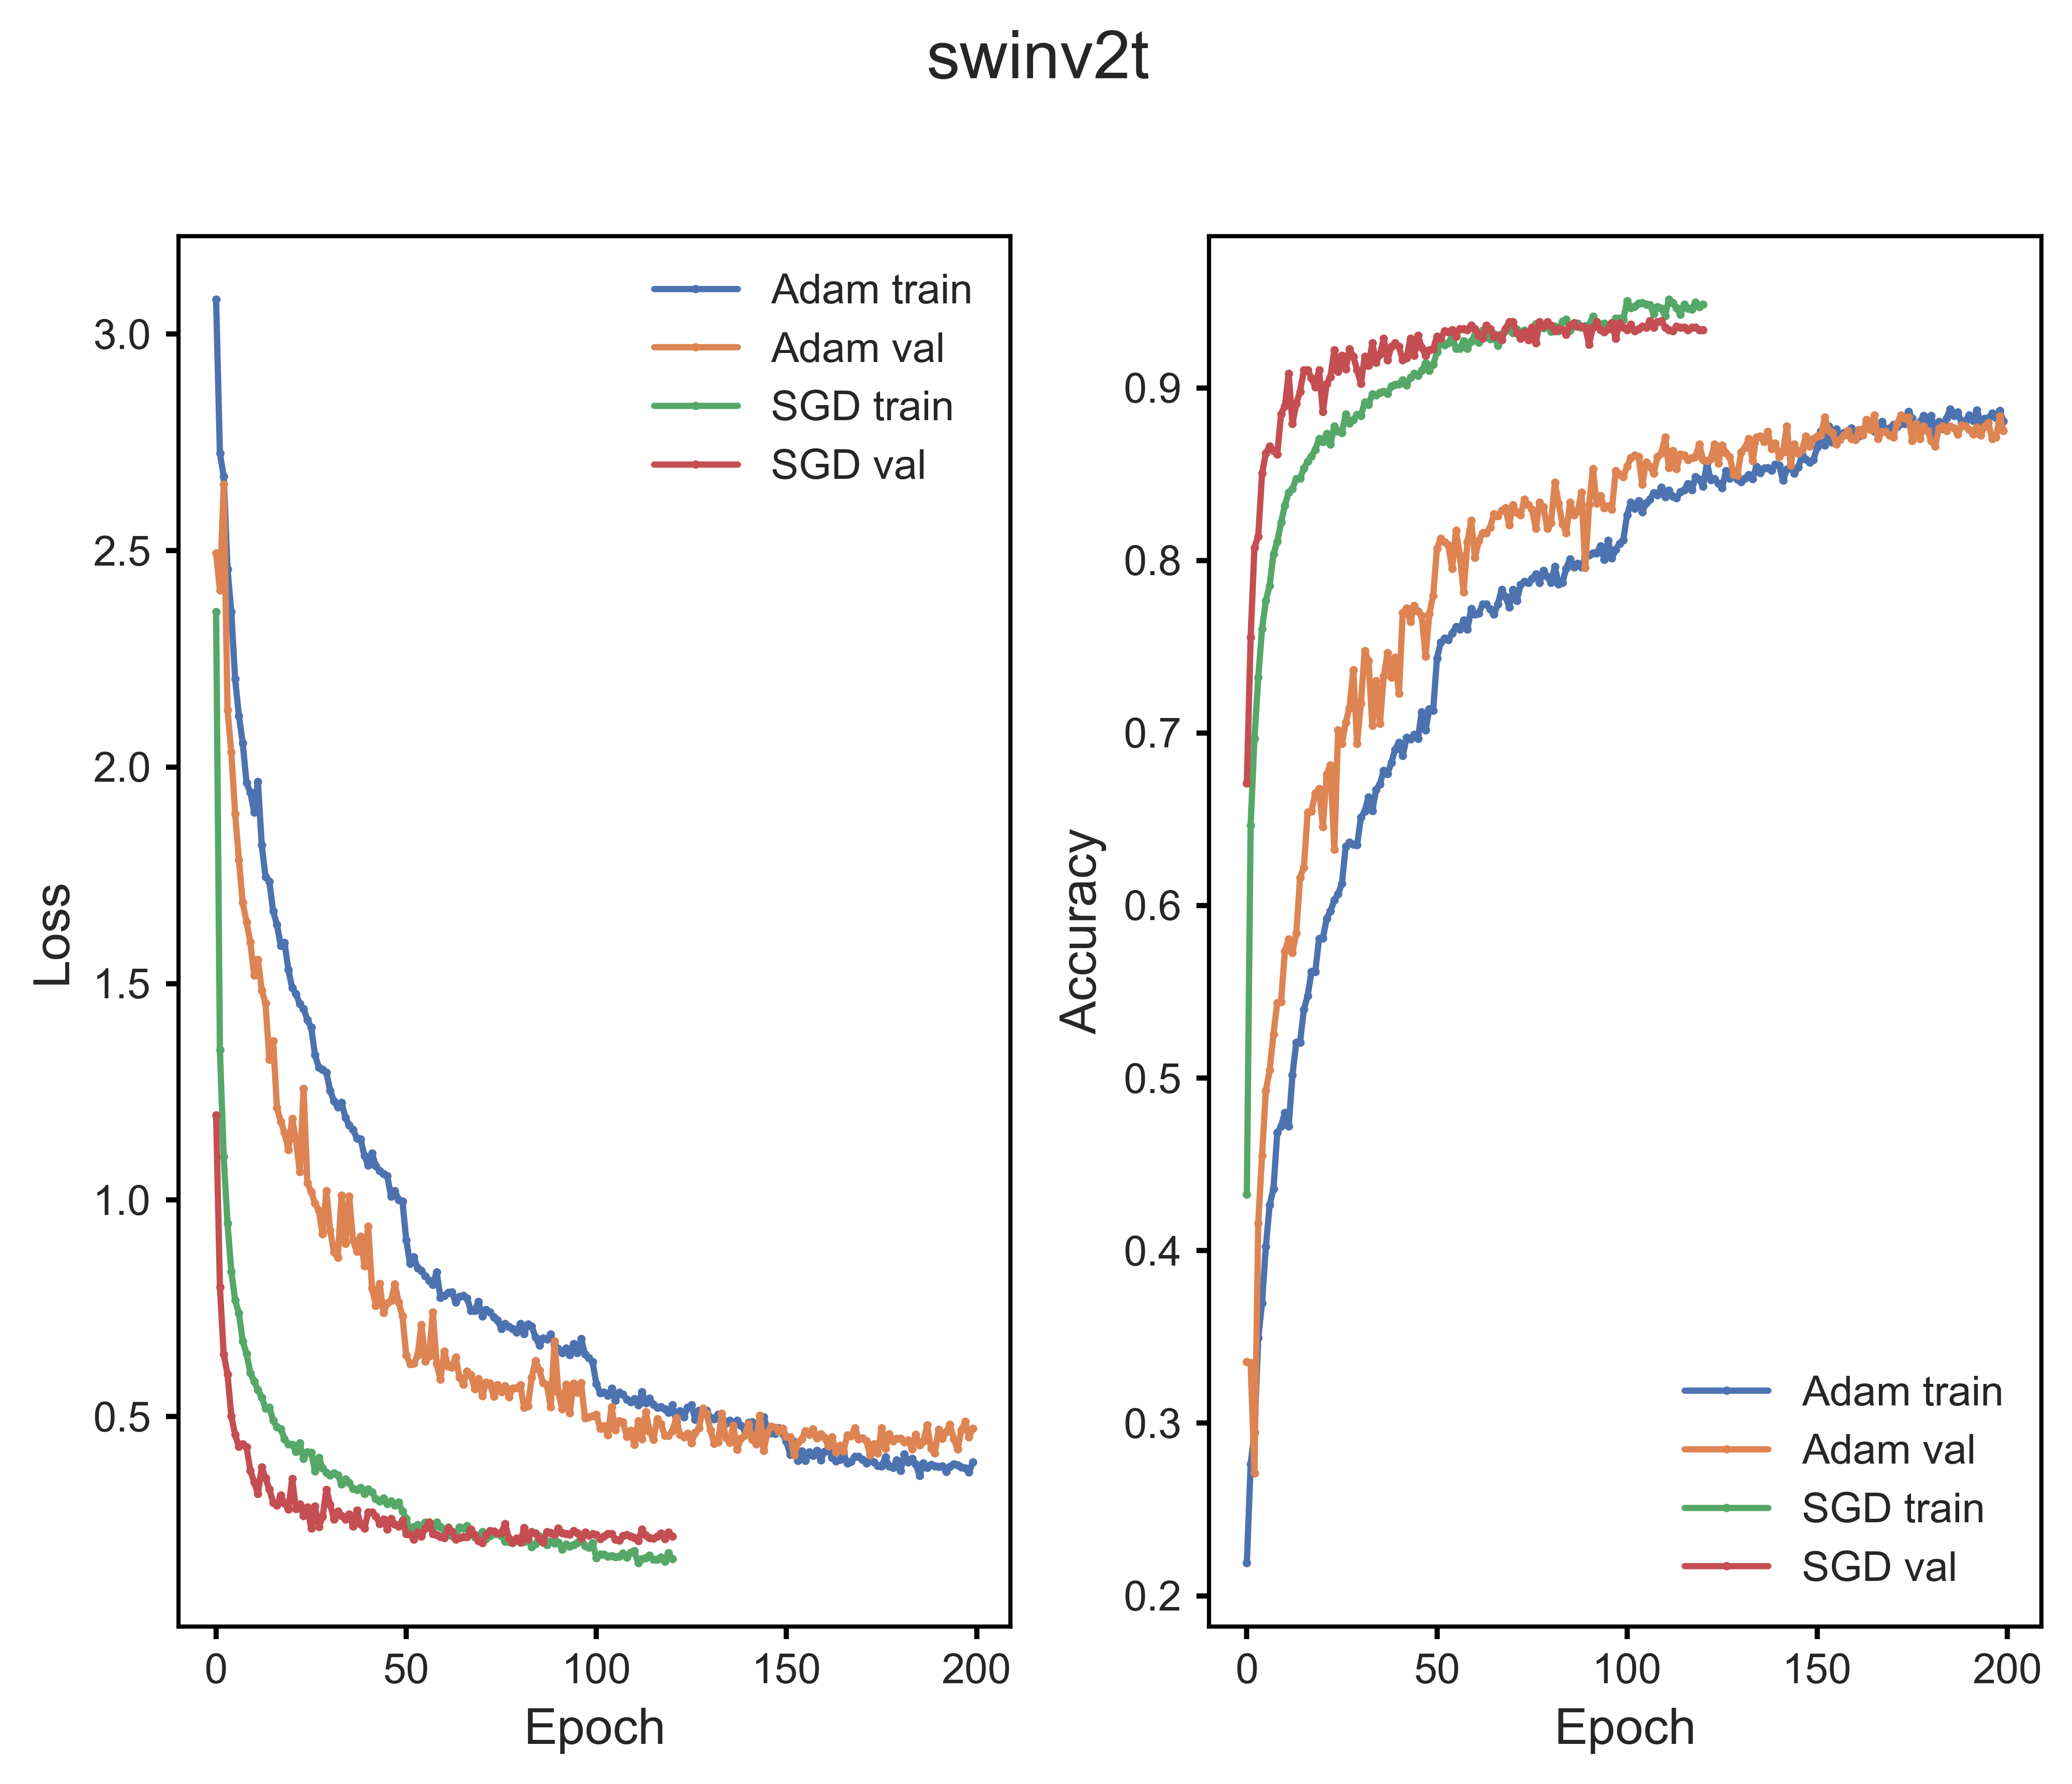

In [15]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style to "ticks" (remove grid lines)
sns.set(style='ticks')

# Global font and image settings (prefer Arial, falling back to the default if unavailable)
font_family = "Arial"
plt.rcParams.update({
    'font.family': font_family,
    'font.size': 10,
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.dpi': 600,
    'savefig.dpi': 600,
    'savefig.bbox': 'tight'
})

# Function to set axes spines color to black and update tick parameters
def set_axes_black(ax):
    for spine in ax.spines.values():
        spine.set_color('black')
        spine.set_linewidth(1)
    # Set tick parameters: ticks pointed outwards, length 3, and color black
    ax.tick_params(axis='both', which='both', direction='out', length=3, color='black')

# Define the folder path containing CSV files
csv_folder = 'models'

# Use glob to get all CSV files in the folder
csv_files = glob.glob(os.path.join(csv_folder, "*.csv"))

# Dictionary to store model data: { model_name: { optimizer: dataframe } }
model_data = {}

# Loop through each CSV file and store data in dictionary
for csv_file in csv_files:
    # Get filename (without directory and extension)
    file_name = os.path.basename(csv_file)
    base_name = os.path.splitext(file_name)[0]
    
    # Split filename by underscore. Expected format: model_optimizer_other
    parts = base_name.split('_')
    if len(parts) < 2:
        print(f"Filename {file_name} does not have enough components to extract model and optimizer.")
        continue
        
    model_name = parts[0]
    optimizer = parts[1]
    
    # Read CSV file into DataFrame
    df = pd.read_csv(csv_file)
    
    # Save DataFrame in dictionary
    if model_name not in model_data:
        model_data[model_name] = {}
    model_data[model_name][optimizer] = df

# Create directory to save figures if it doesn't exist
save_folder = '2-LossVisualization'
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

# Plot loss and accuracy curves for each model using training and validation data
for model, optimizer_data in model_data.items():
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(7, 6))
    
    # Left subplot: Loss line plot
    ax1 = axes[0]
    for opt, df in optimizer_data.items():
        # Separate training and validation data
        train_df = df[df['phase'] == 'train']
        val_df = df[df['phase'] == 'val']
        
        # Plot loss curves for training and validation (both with solid line and circular markers)
        ax1.plot(train_df['epoch'], train_df['loss'], '-o', markersize=1, label=f'{opt} train')
        ax1.plot(val_df['epoch'], val_df['loss'], '-o', markersize=1, label=f'{opt} val')
    
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend(frameon=False)
    ax1.grid(False)  # Remove grid lines
    set_axes_black(ax1)  # Set axes spines color and tick parameters
    
    # Right subplot: Accuracy line plot
    ax2 = axes[1]
    for opt, df in optimizer_data.items():
        # Separate training and validation data
        train_df = df[df['phase'] == 'train']
        val_df = df[df['phase'] == 'val']
        
        ax2.plot(train_df['epoch'], train_df['acc'], '-o', markersize=1, label=f'{opt} train')
        ax2.plot(val_df['epoch'], val_df['acc'], '-o', markersize=1, label=f'{opt} val')
    
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend(frameon=False)
    ax2.grid(False)  # Remove grid lines
    set_axes_black(ax2)
    
    # Overall title
    plt.suptitle(f'{model}', fontsize=16)
    
    # Adjust layout to ensure the suptitle doesn't overlap with subplots
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    
    # Save the figure using the model name as filename in both PNG and PDF formats
    png_path = os.path.join(save_folder, f"{model}.png")
    pdf_path = os.path.join(save_folder, f"{model}.pdf")
    plt.savefig(png_path, dpi=600)
    plt.savefig(pdf_path, dpi=600)
    plt.show()